# Deep Learning Models

### Idea
- **Inspired by the brain**: 
    - Modeled after the structure and function of the brain.
    - Utilizes interconnected layers of artificial neurons to process information.
- **Function of artificial neurons**:
    - Mimic biological neurons by taking inputs, applying transformations, and producing outputs.


### Building Blocks
- **Artificial neurons**:
    - Simple processing units within neural networks.
    - Take inputs, apply an activation function, and produce an output.
- **Activation functions**:
    - Introduce non-linearity, essential for learning complex patterns.
    - Examples: ReLU (Rectified Linear Unit), sigmoid.
- **Layers**:
    - Stacked neurons forming a network.
    - Extract features from data at increasing levels of abstraction.

### Learning
- **Loss function**:
    - Measures the discrepancy between predicted and true values.
    - Examples: Mean Squared Error, Cross-Entropy.
- **Optimization algorithm**:
    - Adjusts network weights to minimize the loss.
    - Examples: Gradient Descent, Adam.

### Training
- **Steps**:
    1. Feed data (e.g., images, text) through the network.
    2. Calculate the loss.
    3. Update weights using the optimization algorithm.
    4. Repeat for many iterations until the loss converges.

### Common Architectures
- **Convolutional Neural Networks (CNNs)**:
    - Ideal for image recognition tasks.
    - Utilize filters to extract spatial features.
- **Recurrent Neural Networks (RNNs)**:
    - Suited for sequential data like text or time series.
    - Incorporate loops or memory cells to process sequences.
- **Transformers**:
    - Effective for natural language processing.
    - Utilize attention mechanisms to focus on relevant parts of the input.

### Applications
- **Wide Range of Applications**:
    - Image recognition
    - Object detection
    - Natural language processing
    - Machine translation
    - Speech recognition
    - Robotics


#### Activation Functions

- **ReLU (Rectified Linear Unit):** $ f(x) = \max(0, x) $
  - Simple and computationally efficient, addresses the vanishing gradient problem.

- **Sigmoid:** $ f(x) = \frac{1}{1 + \exp(-x)} $
  - Outputs values between 0 and 1, suitable for binary classification.

- **Tanh (Hyperbolic Tangent):** $ f(x) = \frac{\exp(x) - \exp(-x)}{\exp(x) + \exp(-x)} $
  - Similar to sigmoid but outputs between -1 and 1.

- **Softmax:** $ f(x_i) = \frac{\exp(x_i)}{\sum_j \exp(x_j)} $
  - Used for multi-class classification, outputs probabilities for each class.

#### Less Common, But Useful Activation Functions

- **Leaky ReLU:** $ f(x) = \max(\alpha * x, x) $
  - Similar to ReLU, but allows a small negative gradient when $ x < 0 $, mitigating the dying ReLU problem.

- **Exponential Linear Unit (ELU):** $ f(x) = \begin{cases} x & \text{if } x \geq 0 \\ \alpha * (\exp(x) - 1) & \text{otherwise} \end{cases} $
  - Smooth transition around $ x = 0 $, avoiding harsh cut-off like ReLU.

- **Scaled Exponential Linear Unit (SELU):** $ f(x) = \lambda * \alpha * (\exp(x) - 1) $
  - Variant of ELU with learnable parameters for scaling and shifting.

- **Swish:** $ f(x) = \frac{x}{1 + \exp(-\beta * x)} $
  - Smooth non-monotonicity like ReLU, but with bounded output like sigmoid.

- **Mish:** $ f(x) = x * \tanh(\ln(1 + \exp(x))) $
  - Smooth and monotonic, with bounded output between 0 and 1.


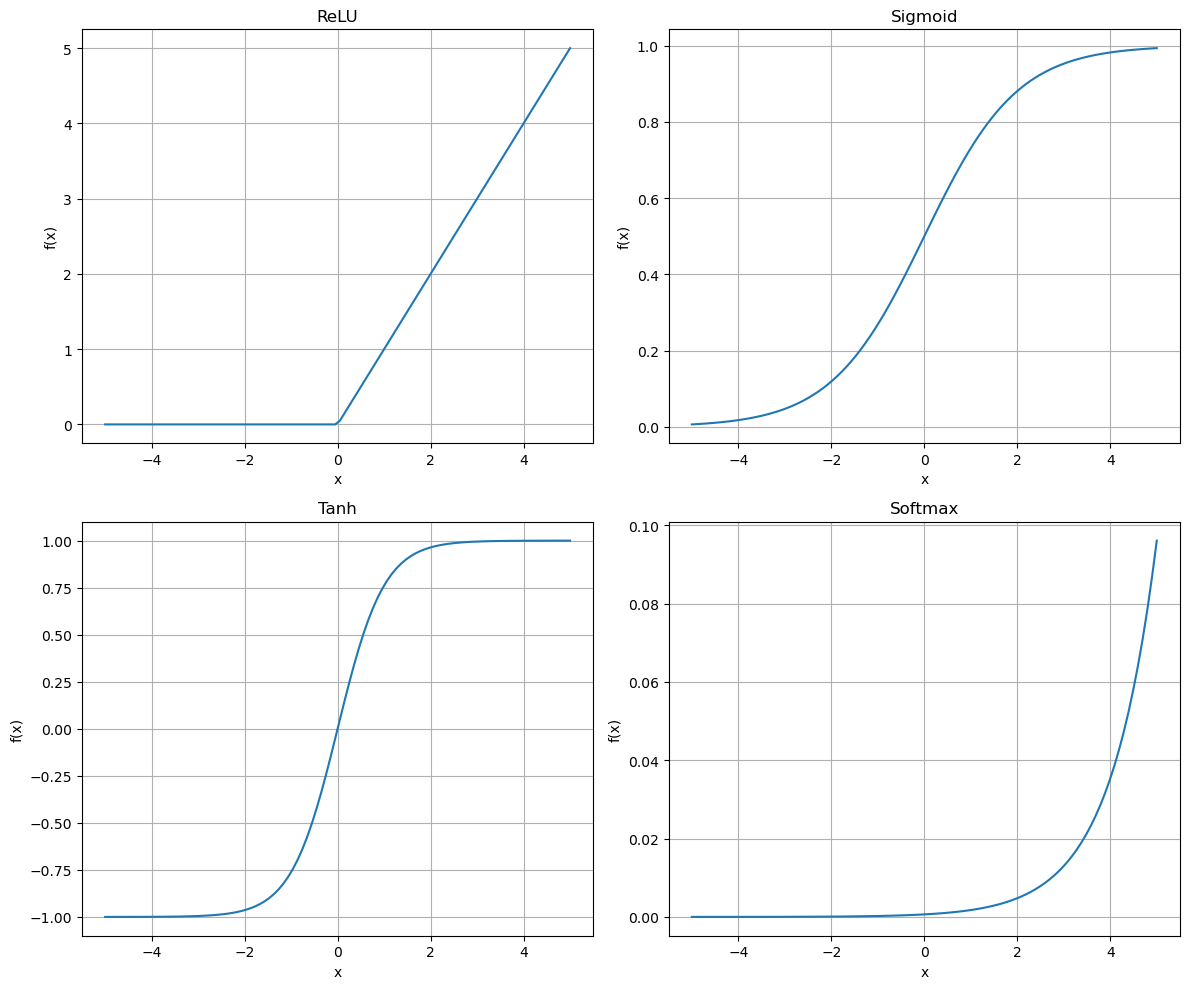

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define ReLU function
def relu(x):
    return np.maximum(0, x)

# Define Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define Tanh function
def tanh(x):
    return np.tanh(x)

# Define Softmax function
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

# Generate x data
x = np.linspace(-5, 5, 100)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot ReLU
axs[0, 0].plot(x, relu(x))
axs[0, 0].set_title('ReLU')

# Plot Sigmoid
axs[0, 1].plot(x, sigmoid(x))
axs[0, 1].set_title('Sigmoid')

# Plot Tanh
axs[1, 0].plot(x, tanh(x))
axs[1, 0].set_title('Tanh')

# Plot Softmax
axs[1, 1].plot(x, softmax(x))
axs[1, 1].set_title('Softmax')

# Set common labels
for ax in axs.flat:
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [3]:
np.random.seed(0)
X = np.linspace(-5, 5, 100).reshape(-1, 1)  # Input data
weights = np.random.randn(1, X.shape[1])  # Random weights
bias = np.random.randn(1)  # Random bias

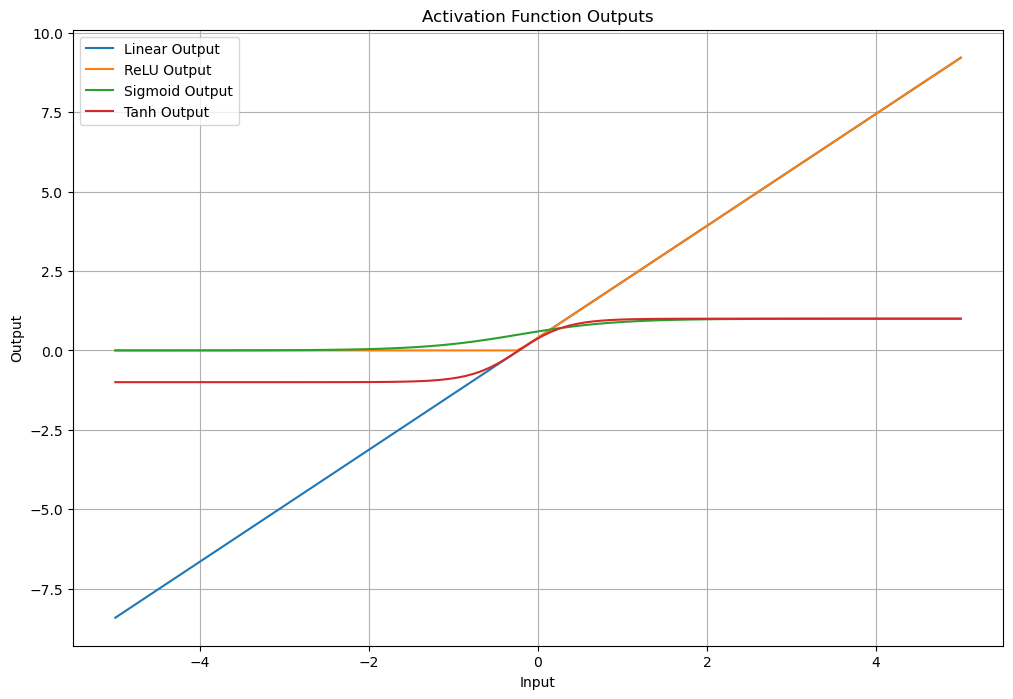

In [4]:


# Compute linear combination (without activation)
linear_output = np.dot(X, weights.T) + bias

# Define activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# Apply activation functions to linear output
relu_output = relu(linear_output)
sigmoid_output = sigmoid(linear_output)
tanh_output = tanh(linear_output)

# Plot results
plt.figure(figsize=(12, 8))

plt.plot(X, linear_output, label='Linear Output')
plt.plot(X, relu_output, label='ReLU Output')
plt.plot(X, sigmoid_output, label='Sigmoid Output')
plt.plot(X, tanh_output, label='Tanh Output')

plt.title('Activation Function Outputs')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()


complicated_function ~ 1 + 2x^2 + 5x^3

## Equation representing an output of the NN
$\bf \Large \hat{y} = f_3(f_2(f_1(x \cdot W_1 + b_1) \cdot W_2 + b_2) \cdot W_3 + b_3)$
where  
$\bf f_i$ is an activation function ( can be different in different layer)  
$ W_i$ are weights in each layer  
$ b_i$ are biases  
$\bf  \text{MSE} = \dfrac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2 $

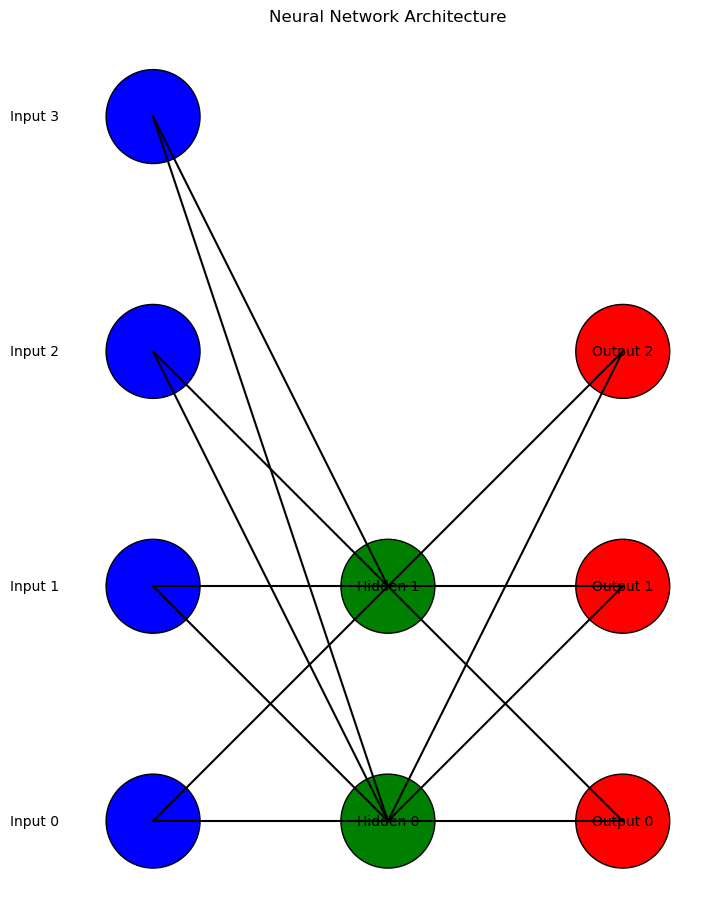

In [5]:
import matplotlib.pyplot as plt

# Define the architecture of the neural network
input_units = 4
hidden_units = 2
output_units = 3

# Calculate the width of the figure based on the number of layers
fig_width = 8

# Create a new figure for the plot with a larger width
fig, ax = plt.subplots(figsize=(fig_width, 16))

# Draw the input layer
for i in range(input_units):
    ax.add_patch(plt.Circle((0, i), radius=0.2, color='blue', ec='black'))
    ax.text(-0.4, i, f'Input {i}', va='center', ha='right', fontsize=10)

# Draw the hidden layer
for i in range(hidden_units):
    ax.add_patch(plt.Circle((1, i), radius=0.2, color='green', ec='black'))
    ax.text(1, i, f'Hidden {i}', va='center', ha='center', fontsize=10)

# Draw the output layer
for i in range(output_units):
    ax.add_patch(plt.Circle((2, i), radius=0.2, color='red', ec='black'))
    ax.text(2, i, f'Output {i}', va='center', ha='center', fontsize=10)

# Connect the layers
for i in range(input_units):
    for j in range(hidden_units):
        ax.plot([0, 1], [i, j], color='black')

for i in range(hidden_units):
    for j in range(output_units):
        ax.plot([1, 2], [i, j], color='black')

# Set the aspect ratio to be equal
ax.set_aspect('equal')

# Remove axis ticks and labels
ax.axis('off')

# Set title
plt.title('Neural Network Architecture', fontsize=12)

# Show the plot
plt.show()


In [6]:
import pandas as pd
import numpy as np
loan = pd.read_csv('loan.csv')
loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [7]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan = loan.dropna()
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
x = pd.get_dummies(loan[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]).astype('float32')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(loan['Loan_Status']).astype('float32')

In [10]:
x.shape

(480, 20)

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC, Accuracy
from tensorflow.keras.callbacks import EarlyStopping

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=x_train.shape[1:]))  # Adjust units if needed
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=BinaryCrossentropy(), optimizer=legacy.Adam(), metrics=[AUC(), Accuracy()])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, 
          validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/10


2024-02-09 00:15:48.036483: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-02-09 00:15:48.036541: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-09 00:15:48.036553: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-09 00:15:48.036622: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-09 00:15:48.036649: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-02-09 00:15:48.450898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 4s 40ms/step - loss: 491.1626 - auc: 0.4881 - accuracy: 0.3698 - val_loss: 119.2295 - val_auc: 0.4926 - val_accuracy: 0.6979
Epoch 2/10
12/12 [==============================] - 0s 16ms/step - loss: 134.8927 - auc: 0.4890 - accuracy: 0.6641 - val_loss: 61.7491 - val_auc: 0.5116 - val_accuracy: 0.5312
Epoch 3/10
12/12 [==============================] - 0s 15ms/step - loss: 65.4711 - auc: 0.5114 - accuracy: 0.2917 - val_loss: 22.6797 - val_auc: 0.5793 - val_accuracy: 0.3958
Epoch 4/10
12/12 [==============================] - 0s 15ms/step - loss: 48.0258 - auc: 0.5042 - accuracy: 0.4531 - val_loss: 49.8857 - val_auc: 0.5425 - val_accuracy: 0.3021
Epoch 5/10
12/12 [==============================] - 0s 15ms/step - loss: 40.3915 - auc: 0.4942 - accuracy: 0.3411 - val_loss: 31.4172 - val_auc: 0.4548 - val_accuracy: 0.3333
Epoch 6/10
12/12 [==============================] - 0s 15ms/step - loss: 33.4441 - auc: 0.4786 - accuracy: 0.2682 - val_loss: 20.2540

In [12]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape input data for CNN (assuming your data has a tabular structure)
x_train_cnn = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)


# Define CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(loss=BinaryCrossentropy(), optimizer=legacy.Adam(), metrics=[AUC(), Accuracy()])

# Train the model
model.fit(x_train_cnn, y_train, epochs=10, batch_size=32, 
          validation_data=(x_test_cnn, y_test), callbacks=[early_stopping])


Epoch 1/10
12/12 [==============================] - 2s 41ms/step - loss: 98.0976 - auc_1: 0.5006 - accuracy: 0.3906 - val_loss: 22.5783 - val_auc_1: 0.5877 - val_accuracy: 0.2812
Epoch 2/10
12/12 [==============================] - 0s 17ms/step - loss: 29.9688 - auc_1: 0.4924 - accuracy: 0.3932 - val_loss: 18.8622 - val_auc_1: 0.5410 - val_accuracy: 0.0833
Epoch 3/10
12/12 [==============================] - 0s 15ms/step - loss: 18.0515 - auc_1: 0.4860 - accuracy: 0.2188 - val_loss: 14.3828 - val_auc_1: 0.5667 - val_accuracy: 0.0521
Epoch 4/10
12/12 [==============================] - 0s 15ms/step - loss: 9.4866 - auc_1: 0.5035 - accuracy: 0.2135 - val_loss: 8.8791 - val_auc_1: 0.5368 - val_accuracy: 0.0729
Epoch 5/10
12/12 [==============================] - 0s 15ms/step - loss: 7.8359 - auc_1: 0.4771 - accuracy: 0.2031 - val_loss: 5.3963 - val_auc_1: 0.5415 - val_accuracy: 0.4167
Epoch 6/10
12/12 [==============================] - 0s 18ms/step - loss: 3.3211 - auc_1: 0.4784 - accuracy: 0

## Research vs Industry Use of TensorFlow and PyTorch

---

Both TensorFlow and PyTorch are widely used in deep learning, but their strengths cater to different needs in research and industry settings. Here's a comparison:

---

### Research

**TensorFlow:**

- Pros:
  - Strong community and ecosystem for research papers and code sharing.
  - Extensive support for distributed training on large datasets.
  - TensorFlow Research (TFR) with specialized tools for research, like eager execution and debugging.
  - Integration with Google Cloud Platform for scaling resources.
- Cons:
  - Can be less intuitive for beginners due to its static computational graph approach.
  - Less emphasis on dynamic experimentation compared to PyTorch.

**PyTorch:**

- Pros:
  - Dynamic computation graph makes it easier to experiment and prototype new architectures.
  - Pythonic syntax feels more natural for many researchers.
  - Large selection of pre-trained models and research libraries.
  - Active development and focus on cutting-edge deep learning methods.
- Cons:
  - Less mature ecosystem compared to TensorFlow for production deployment.
  - Distributed training capabilities are evolving but might not be as robust as TensorFlow's.

---

### Industry

**TensorFlow:**

- Pros:
  - Production-ready tools and libraries for deployment in real-world applications.
  - TensorFlow Serving simplifies model serving and inference.
  - Strong community support for industrial applications.
  - Integration with various cloud platforms and deployment tools.
- Cons:
  - Might be less flexible for rapid prototyping and experimentation compared to PyTorch.
  - Learning curve can be steeper for those unfamiliar with static computational graphs.

**PyTorch:**

- Pros:
  - Growing adoption in industry due to its flexibility and dynamic nature.
  - Integration with cloud platforms like AWS SageMaker and Azure Machine Learning.
  - Emerging ecosystem of libraries and tools for production deployment.
- Cons:
  - Production support and tools are still evolving compared to TensorFlow.
  - Might not be the best choice for large-scale deployments with complex requirements.

---

# Time Series Analysis

---

## What is Time Series?

A time series is a sequence of data points collected or recorded at successive and equally spaced intervals of time. It represents how a particular quantity changes over time.

---

## Parts of a Time Series

1. **Time Index**: The time index represents the timestamps associated with each data point in the series.

2. **Observations**: The observations are the data points collected at each timestamp, which can represent any measurable quantity such as temperature, stock prices, or sales.

3. **Trend**: The trend component represents the long-term movement or directionality in the data. It can be increasing, decreasing, or stable over time.

4. **Seasonality**: Seasonality refers to periodic fluctuations or patterns that occur at fixed intervals within the data. These patterns often repeat over the same time span, such as daily, weekly, or yearly.

5. **Cyclical Components**: Cyclical components represent oscillations or fluctuations in the data that are not of fixed period. They are usually driven by economic, business, or environmental cycles.

6. **Irregularity/Noise**: Irregularity or noise refers to random fluctuations or variability in the data that cannot be attributed to the trend, seasonality, or cyclical components.

---

## Why Analyze Time Series?

- Time series analysis helps identify patterns and trends in data over time.
- It enables forecasting future values based on historical observations.
- Time series analysis is widely used in various fields such as finance, economics, meteorology, and engineering for decision-making and planning.



# Time Series: Sequential data points collected over time.
* Trend: Long-term direction or behavior of the data.
* Seasonality: Periodic fluctuations at fixed intervals.
* Cycle: Repetitive patterns over longer periods.
* Irregularity or Noise: Random fluctuations in the data.
* Stationarity: Statistical properties remain constant over time.
* Autocorrelation: Correlation between a time series and its lagged version.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [2]:
df = pd.read_csv('data.csv') ## JJ quaterly earnings

In [4]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961


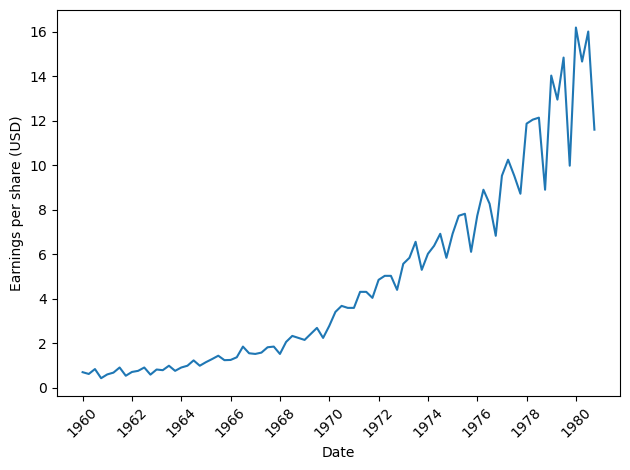

In [5]:
# Plot the time series
plt.plot(df.date, df.data)
plt.xlabel('Date')
plt.ylabel('Earnings per share (USD)')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

STL (Seasonal and Trend decomposition using Loess)
----------------------------------------------------

STL decomposes a time series into three components:
1. Trend (T)
2. Seasonal (S)
3. Residual (R)

Math Formula:
Y(t) = T(t) + S(t) + R(t)

where:
- Y(t) is the observed value at time t
- T(t) is the trend component at time t
- S(t) is the seasonal component at time t
- R(t) is the residual (or remainder) component at time t

STL involves the following steps:
1. Decompose the time series into trend, seasonal, and residual components.
2. Smooth each component using locally weighted regression (Loess).
3. Remove the smoothed trend and seasonal components from the original series to obtain the residual component.

STL is useful for:
- Identifying long-term trends and seasonal patterns in time series data.
- Analyzing and forecasting time series data by removing trend and seasonal effects.


In [6]:
stl = STL(df.data, period=4).fit()

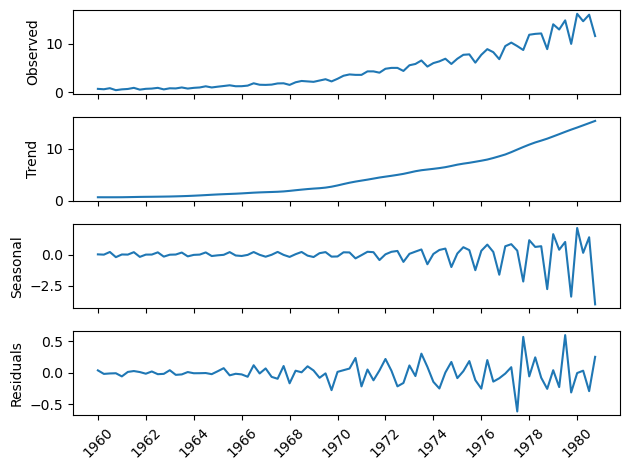

In [7]:
# Create subplots with shared x-axis
fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True)

# Plot each component on separate subplot
axs[0].plot(stl.observed)
axs[0].set_ylabel('Observed')

axs[1].plot(stl.trend)
axs[1].set_ylabel('Trend')

axs[2].plot(stl.seasonal)
axs[2].set_ylabel('Seasonal')

axs[3].plot(stl.resid)
axs[3].set_ylabel('Residuals')

# Set custom x-axis ticks
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


# Plot data with train/test split 

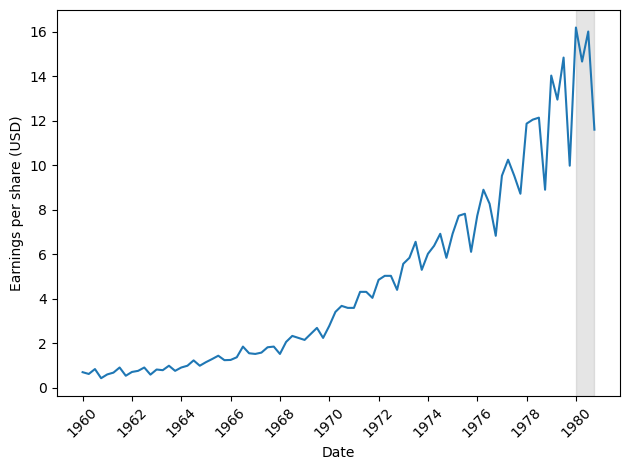

In [8]:
plt.plot(df['date'], df['data'])
plt.xlabel('Date')
plt.ylabel('Earnings per share (USD)')
plt.axvspan(80, 83, color='gray', alpha=0.2)
plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980], rotation=45)
plt.tight_layout()
plt.show()

# Split to train/test 
# Not done randomly

In [9]:
train = df[:-4]
test = df[-4:]
test

,date,data,year
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980
83,1980-10-01,11.61,1980


# Predict historical mean 

In [10]:
historical_mean = np.mean(train['data']).round(3)
historical_mean

4.308

In [12]:
test['pred_mean'] = historical_mean
test

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_21180/2535678498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_mean'] = historical_mean


,date,data,year,pred_mean
80,1980-01-01,16.20,1980,4.308
81,1980-04-01,14.67,1980,4.308
82,1980-07-02,16.02,1980,4.308
83,1980-10-01,11.61,1980,4.308


In [13]:
# Mean Absolute Percentage Error (MAPE) 
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
mape_hist_mean

70.01100632935704

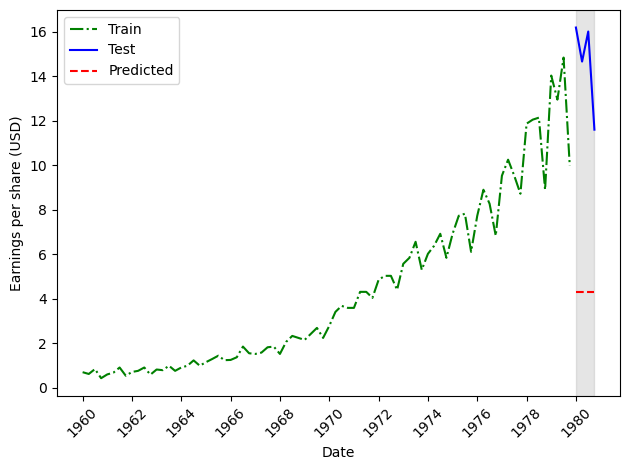

In [15]:
import matplotlib.pyplot as plt

plt.plot(train['date'], train['data'], 'g-.', label='Train')
plt.plot(test['date'], test['data'], 'b-', label='Test')
plt.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Earnings per share (USD)')
plt.axvspan(80, 83, color='#808080', alpha=0.2)
plt.legend(loc='upper left')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Predict last year mean 

In [16]:
last_year_mean = np.mean(train['data'][-4:])
last_year_mean

12.96

In [17]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean
test

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_21180/256339961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred__last_yr_mean'] = last_year_mean


,date,data,year,pred_mean,pred__last_yr_mean
80,1980-01-01,16.20,1980,4.308,12.96
81,1980-04-01,14.67,1980,4.308,12.96
82,1980-07-02,16.02,1980,4.308,12.96
83,1980-10-01,11.61,1980,4.308,12.96


In [19]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
mape_last_year_mean

15.5963680725103

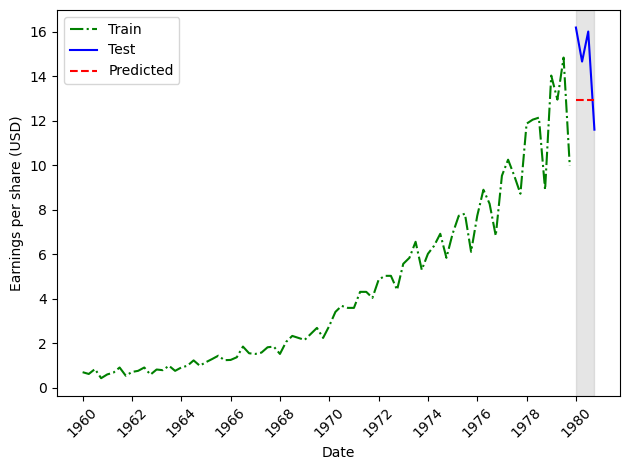

In [20]:
import matplotlib.pyplot as plt
plt.plot(train['date'], train['data'], 'g-.', label='Train')
plt.plot(test['date'], test['data'], 'b-', label='Test')
plt.plot(test['date'], test['pred__last_yr_mean'], 'r--', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Earnings per share (USD)')
plt.axvspan(80, 83, color='#808080', alpha=0.2)
plt.legend(loc='upper left')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Predict last know value 

In [21]:
last = train['data'].iloc[-1]
last

9.99

In [23]:
test.loc[:, 'pred_last'] = last

test

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_21180/1150534152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last


,date,data,year,pred_mean,pred__last_yr_mean,pred_last
80,1980-01-01,16.20,1980,4.308,12.96,9.99
81,1980-04-01,14.67,1980,4.308,12.96,9.99
82,1980-07-02,16.02,1980,4.308,12.96,9.99
83,1980-10-01,11.61,1980,4.308,12.96,9.99


In [24]:
mape_last = mape(test['data'], test['pred_last'])
mape_last

30.457277908606535

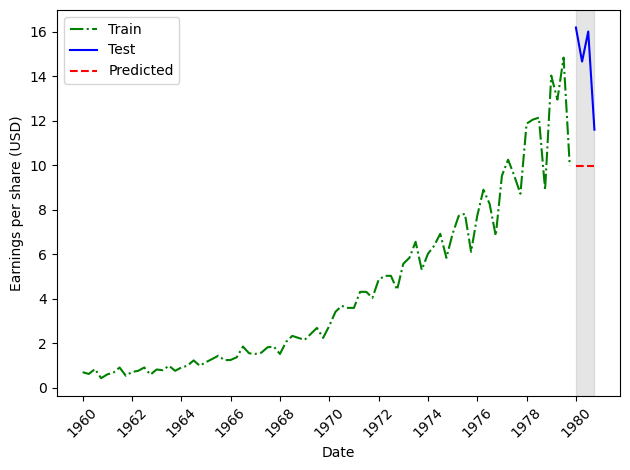

In [25]:
import matplotlib.pyplot as plt

plt.plot(train['date'], train['data'], 'g-.', label='Train')
plt.plot(test['date'], test['data'], 'b-', label='Test')
plt.plot(test['date'], test['pred_last'], 'r--', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Earnings per share (USD)')
plt.axvspan(80, 83, color='#808080', alpha=0.2)
plt.legend(loc='upper left')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Naive seasonal forecast 

In [26]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values
test

/var/folders/sz/3pgn8fsd6v5g9t57hwhf_3sw0000gn/T/ipykernel_21180/3592705622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_season'] = train['data'][-4:].values


,date,data,year,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,1980,4.308,12.96,9.99,14.04
81,1980-04-01,14.67,1980,4.308,12.96,9.99,12.96
82,1980-07-02,16.02,1980,4.308,12.96,9.99,14.85
83,1980-10-01,11.61,1980,4.308,12.96,9.99,9.99


In [27]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
mape_naive_seasonal

11.561658552433654

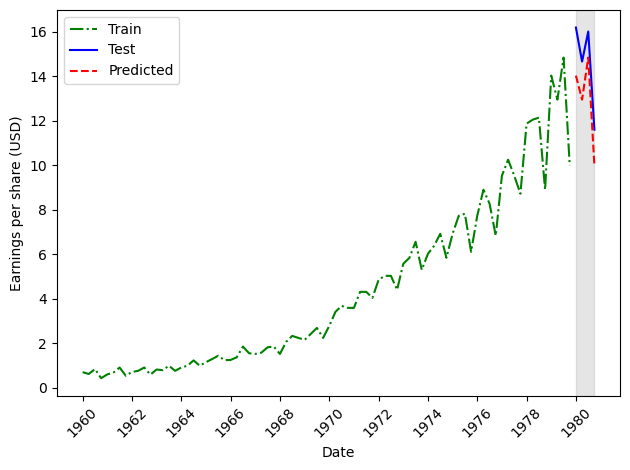

In [28]:
import matplotlib.pyplot as plt

plt.plot(train['date'], train['data'], 'g-.', label='Train')
plt.plot(test['date'], test['data'], 'b-', label='Test')
plt.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')

plt.xlabel('Date')
plt.ylabel('Earnings per share (USD)')
plt.axvspan(80, 83, color='#808080', alpha=0.2)
plt.legend(loc='upper left')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## The random walk process 

In [30]:
np.random.seed(42)
steps = np.random.standard_normal(1000)
steps[0]=0
random_walk = np.cumsum(steps)

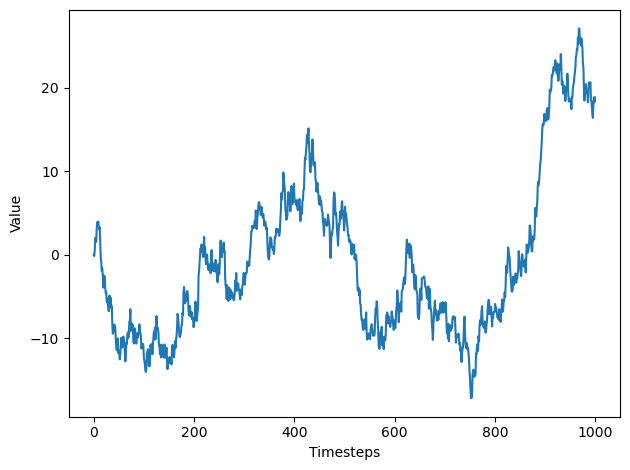

In [31]:
plt.plot(random_walk)
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

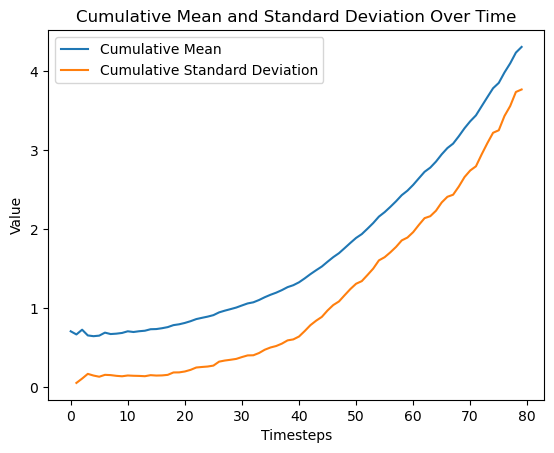

In [32]:
import matplotlib.pyplot as plt

# Calculate cumulative mean and standard deviation
cumulative_mean = train.data.cumsum() / (np.arange(len(train)) + 1)
cumulative_std = train.data.expanding().std()

# Plot cumulative mean
plt.plot(cumulative_mean, label='Cumulative Mean')

# Plot cumulative standard deviation
plt.plot(cumulative_std, label='Cumulative Standard Deviation')

plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.legend()
plt.title('Cumulative Mean and Standard Deviation Over Time')

plt.show()


# Augmented Dickey-Fuller (ADF) Test

- The ADF test is a statistical test used to determine whether a unit root is present in a time series dataset.
- A unit root indicates that the time series is non-stationary, meaning its statistical properties such as mean and variance are not constant over time.

## Null and Alternative Hypotheses

- **Null Hypothesis (H0):** A unit root is present in the time series (indicating non-stationarity).
- **Alternative Hypothesis (H1):** The time series is stationary (no unit root is present).

- The ADF test produces a test statistic and a p-value.
- A low p-value (typically below a chosen significance level, e.g., 0.05) indicates evidence against the null hypothesis, suggesting that the time series is stationary.

- Implemented in libraries like `statsmodels` in Python.
- The `adfuller` function from `statsmodels.tsa.stattools` is commonly used.
- It takes a time series dataset as input and returns the ADF test statistic, p-value, critical values, and other diagnostic information.


In [34]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(df['data'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: 2.742016573457469
p-value: 1.0


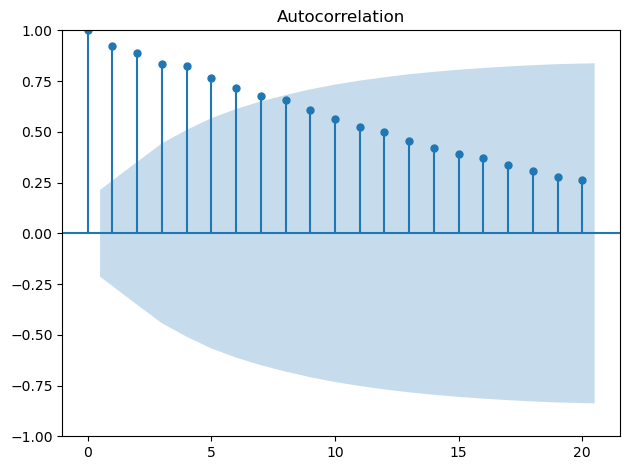

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.data, lags=20);
plt.tight_layout()

In [36]:
diff_df = np.diff(df['data'], n=1)

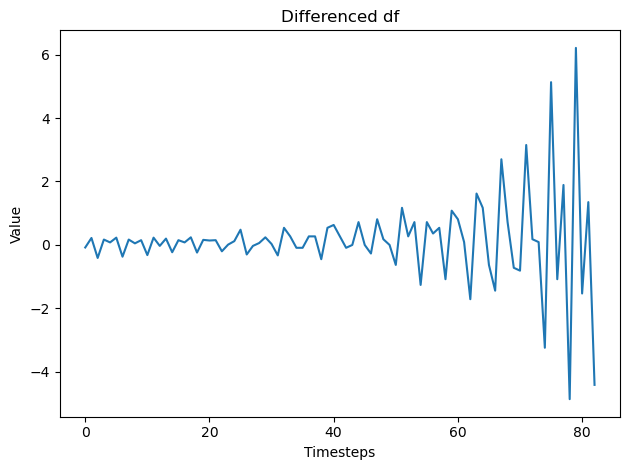

In [37]:
plt.plot(diff_df)
plt.title('Differenced df')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

## Forecasting 


In [38]:
mean = np.mean(train.data)
test['pred_mean'] = mean
test.head()

,date,data,year,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,1980,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,1980,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,1980,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,1980,4.3085,12.96,9.99,9.99


In [39]:
last_value = train.iloc[-1].data

test.loc[:, 'pred_last'] = last_value

test.head()

,date,data,year,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,1980,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,1980,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,1980,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,1980,4.3085,12.96,9.99,9.99
